# Song lyrics - Part 4: Unsupervised learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import sys
sys.path.append('../scripts/')
import lyrics_utils as utils

%matplotlib inline

In [2]:
DATA_FILENAME = '../bands-1pct.csv'

df = utils.load_bands(DATA_FILENAME)
df = df[df['reviews'] > 50].reset_index(drop=True)
names = df['name'].values

In [3]:
vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.9)
corpus = list(df['words'].apply(lambda x: ' '.join(x)))
X = vectorizer.fit_transform(corpus).toarray()
features = np.array(vectorizer.get_feature_names_out())

C:\Users\philn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [4]:
X_svd = TruncatedSVD(n_components=2).fit_transform(X)

In [5]:
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

        sse.append(curr_sse)
    return sse

C:\Users\philn\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


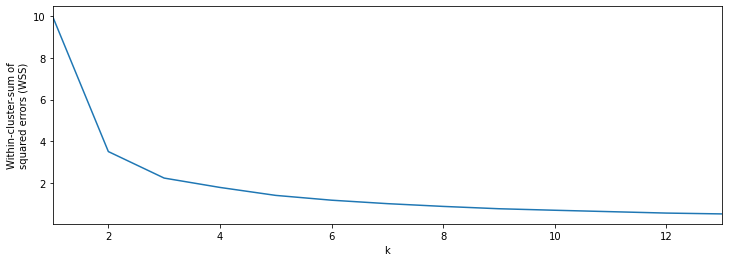

In [6]:
k_max = 13
wss = calculate_WSS(X_svd, 13)
plt.figure(figsize=(12, 4))
plt.plot(range(1, k_max + 1), wss)
plt.xlim(1, k_max)
plt.xlabel("k")
plt.ylabel("Within-cluster-sum of\nsquared errors (WSS)")
plt.show()

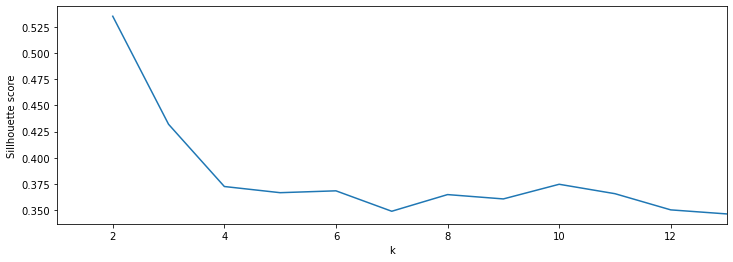

In [8]:
sil = []
kmax = 13
for k in range(2, k_max + 1):
    kmeans = KMeans(n_clusters=k).fit(X_svd)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_svd, labels, metric='euclidean'))
    
plt.figure(figsize=(12, 4))
plt.plot(range(2, k_max + 1), sil)
plt.xlim(1, k_max)
plt.xlabel("k")
plt.ylabel("Sillhouette score")
plt.show()

In [12]:
n_clusters = 7
kmeans_svd = KMeans(n_clusters=n_clusters).fit(X_svd)
labels = kmeans_svd.labels_

In [13]:
for i in range(n_clusters):
    print(names[labels == i])

['Burzum' 'Cynic' 'Death' 'Obituary' 'Fear Factory' 'Atheist'
 'Electric Wizard' 'Anaal Nathrakh' 'Killswitch Engage' 'Týr' 'Wintersun'
 'Alestorm' 'Ghost' 'Deafheaven']
['Blind Guardian' 'Katatonia' 'Entombed' 'In Flames' 'Soilwork' 'Samael'
 'Dream Theater' 'Skyclad' 'Testament' 'Sepultura' 'Hypocrisy' 'Kamelot'
 'Exodus' 'Death Angel' 'Mercyful Fate' 'Stratovarius' 'Artillery'
 'Running Wild' 'Avantasia' 'Machine Head' 'Grave Digger' 'Anathema'
 'Angra' 'Fates Warning' 'The Gathering' 'Primal Fear' 'Mastodon'
 'Evergrey' 'Epica' 'Municipal Waste']
['Cryptopsy' 'Morbid Angel' 'Dimmu Borgir' 'Origin' 'Therion' 'Enslaved'
 'Suffocation' 'Dismember' 'Vader' 'Darkthrone' 'Deicide'
 'Malevolent Creation' 'Cannibal Corpse' 'Immolation' 'Bloodbath'
 'Rotting Christ' 'Satyricon' 'Marduk' 'Primordial' 'Asphyx'
 'Dark Funeral' 'Grave' 'The Black Dahlia Murder']
['Amorphis' 'Iced Earth' 'Dark Tranquillity' 'Arch Enemy' 'Candlemass'
 'Opeth' 'Nightwish' 'Nevermore' 'Dying Fetus' 'Sigh' 'Lamb of 

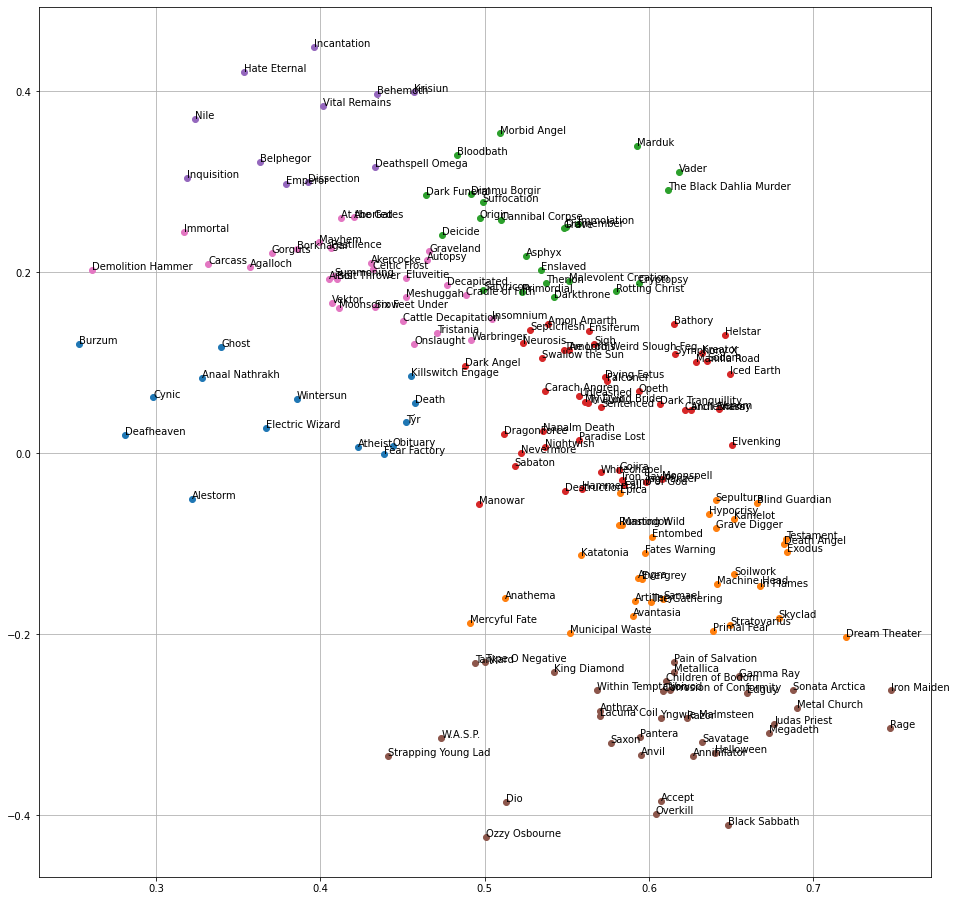

In [14]:
plt.figure(figsize=(16, 16))
for i in range(n_clusters):
    cluster_idx = np.where(labels == i)[0]
    x, y = X_svd[cluster_idx].T
    plt.plot(x, y, 'o')
    for j in range(len(cluster_idx)):
        plt.text(x[j], y[j], names[cluster_idx][j])
plt.grid()
plt.show()

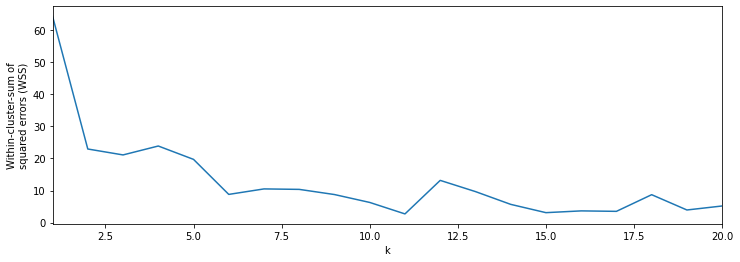

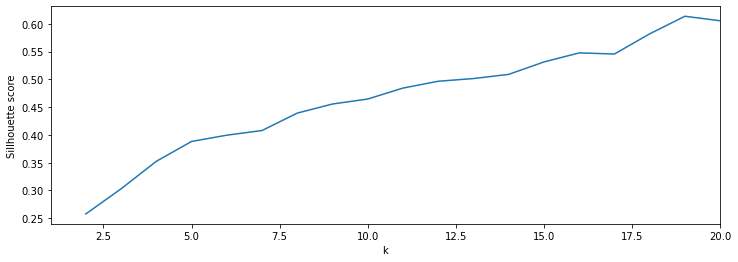

In [250]:
Y = df[[c for c in df.columns if 'genre_' in c]].values

k_max = 20
wss = calculate_WSS(Y, k_max)
plt.figure(figsize=(12, 4))
plt.plot(range(1, k_max + 1), wss)
plt.xlim(1, k_max)
plt.xlabel("k")
plt.ylabel("Within-cluster-sum of\nsquared errors (WSS)")
plt.show()

sil = []
k_max = 20
for k in range(2, k_max + 1):
    kmeans = KMeans(n_clusters=k).fit(Y)
    labels = kmeans.labels_
    sil.append(silhouette_score(Y, labels, metric='euclidean'))
    
plt.figure(figsize=(12, 4))
plt.plot(range(2, k_max + 1), sil)
plt.xlim(1, k_max)
plt.xlabel("k")
plt.ylabel("Sillhouette score")
plt.show()

In [249]:
n_clusters = 11
kmeans = KMeans(n_clusters=n_clusters).fit(Y)
labels = kmeans.labels_
for i in range(n_clusters):
    print(names[labels == i])

['Carcass' 'Dying Fetus' 'Napalm Death' 'Cattle Decapitation']
['Entombed' 'Dark Tranquillity' 'Arch Enemy' 'In Flames' 'Cryptopsy'
 'Children of Bodom' 'Cradle of Filth' 'Soilwork' 'At the Gates'
 'Strapping Young Lad' 'Morbid Angel' 'Sepultura' 'Origin' 'Therion'
 'Hypocrisy' 'Decapitated' 'Suffocation' 'Dismember' 'Hate Eternal' 'Nile'
 'Vader' 'Darkthrone' 'Deicide' 'Amon Amarth' 'Obituary'
 'Malevolent Creation' 'Dissection' 'Cannibal Corpse' 'Fear Factory'
 'Immolation' 'Krisiun' 'Aborted' 'Bolt Thrower' 'Nocturnal Rites'
 'Behemoth' 'Autopsy' 'Unleashed' 'Kalmah' 'Vital Remains' 'Septicflesh'
 'Grave' 'Six Feet Under' 'Gorguts' 'Belphegor' 'Insomnium'
 'The Black Dahlia Murder' 'Eluveitie' 'Wintersun' 'Fleshgod Apocalypse']
['Manowar' 'Savatage' 'HammerFall' 'Running Wild' 'Metal Church'
 'Manilla Road' 'Grave Digger' 'Rage']
['Iced Earth' 'Meshuggah' 'Testament' 'Slayer' 'Voivod' 'Metallica'
 'Dark Angel' 'Megadeth' 'Annihilator' 'Destruction' 'Kreator' 'Overkill'
 'Anthrax' 'E

In [1]:
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore

from nlp import get_stopwords, tokenize, lemmatize

C:\Users\philippe\Anaconda3\envs\metallyrics\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# df = pd.read_csv('songs-ml-1pct.csv')
# genres = df.columns[1:]
# X = df.lyrics.values

In [3]:
# vectorizer = TfidfVectorizer(stop_words=get_stopwords(), min_df=50)
# X_v = vectorizer.fit_transform(X)
# print(X_v.shape)
# vocabulary = vectorizer.get_feature_names()

C:\Users\philippe\Anaconda3\envs\metallyrics\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['insermi'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(57878, 6370)


In [4]:
# n_components = 5

# lda = LDA(n_components=5)
# X_lda = lda.fit_transform(X_v)
# for i in range(n_components):
#     topic_words = lda.components_[i].argsort()[:-10:-1]
#     print(i)
#     print([vocabulary[word] for word in topic_words])

0
['death', 'life', 'flesh', 'blood', 'dead', 'human', 'pain', 'mind', 'kill']
1
['night', 'light', 'eyes', 'sun', 'black', 'dark', 'cold', 'time', 'sky']
2
['gonna', 'yeah', 'time', 'wanna', 'fuck', 'rock', 'metal', 'fucking', 'kill']
3
['blood', 'death', 'god', 'evil', 'black', 'rise', 'gods', 'fight', 'lord']
4
['time', 'life', 'feel', 'love', 'day', 'eyes', 'mind', 'pain', 'heart']


In [2]:
df = pd.read_csv('songs-1pct.csv')

tokenize_kwargs = dict(english_only=True, stopwords=get_stopwords())
df.loc[:, 'song_words'] = (df.song_darklyrics
                           .apply(tokenize, **tokenize_kwargs)
                           .apply(lemmatize))

In [3]:
df['song_words']

0        [embrace, midwinter, frost, light, darkness, s...
1        [watch, sun, feel, coldness, crawling, sitting...
2        [spellbind, night, anger, rage, force, hate, b...
3        [lost, hall, dream, bound, scream, stand, allo...
4        [sane, wander, hope, master, understand, sickn...
                               ...                        
58169    [withdraw, twitch, hey, personal, faith, reque...
58170    [recite, unspoken, manifest, solid, faith, acc...
58171    [telling, fable, demise, lie, underdog, narrat...
58172    [yard, ruin, shimmer, paint, pale, stale, floc...
58173    [vast, deceiver, underdog, god, crushing, bone...
Name: song_words, Length: 58174, dtype: object

In [4]:
band_words = df.groupby('band_name').song_words.sum()
texts = list(band_words.values)

In [5]:
id2word = Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 5

lda_model = LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics
)

In [6]:
lda_model.print_topics()

[(0,
  '0.013*"life" + 0.010*"time" + 0.008*"death" + 0.007*"night" + 0.007*"blood" + 0.006*"soul" + 0.006*"feel" + 0.006*"god" + 0.006*"light" + 0.006*"pain"'),
 (1,
  '0.013*"life" + 0.010*"time" + 0.007*"light" + 0.007*"soul" + 0.006*"day" + 0.006*"love" + 0.006*"fall" + 0.005*"dream" + 0.005*"mind" + 0.005*"death"'),
 (2,
  '0.012*"time" + 0.010*"life" + 0.007*"death" + 0.007*"night" + 0.007*"blood" + 0.006*"mind" + 0.005*"feel" + 0.005*"god" + 0.005*"soul" + 0.005*"dream"'),
 (3,
  '0.011*"life" + 0.007*"mind" + 0.006*"soul" + 0.006*"time" + 0.006*"night" + 0.005*"death" + 0.005*"light" + 0.005*"fear" + 0.005*"blood" + 0.005*"lie"'),
 (4,
  '0.012*"life" + 0.010*"time" + 0.008*"death" + 0.007*"blood" + 0.006*"night" + 0.006*"soul" + 0.006*"god" + 0.006*"feel" + 0.005*"dead" + 0.005*"lie"')]

In [10]:
help(lda_model)

Help on LdaMulticore in module gensim.models.ldamulticore object:

class LdaMulticore(gensim.models.ldamodel.LdaModel)
 |  LdaMulticore(corpus=None, num_topics=100, id2word=None, workers=None, chunksize=2000, passes=1, batch=False, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, random_state=None, minimum_probability=0.01, minimum_phi_value=0.01, per_word_topics=False, dtype=<class 'numpy.float32'>)
 |  
 |  The constructor estimates Latent Dirichlet Allocation model parameters based
 |  on a training corpus:
 |  
 |  >>> lda = LdaMulticore(corpus, num_topics=10)
 |  
 |  You can then infer topic distributions on new, unseen documents, with
 |  
 |  >>> doc_lda = lda[doc_bow]
 |  
 |  The model can be updated (trained) with new documents via
 |  
 |  >>> lda.update(other_corpus)
 |  
 |  Model persistency is achieved through its `load`/`save` methods.
 |  
 |  Method resolution order:
 |      LdaMulticore
 |      gensim.models.ld

In [7]:
doc_lda = lda_model[corpus]

In [9]:
import os
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./lda_results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './lda_results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.005387 -0.002128       1        1  25.968287
0      0.001482  0.002940       2        1  23.984369
4     -0.001781  0.000885       3        1  17.216673
2     -0.001855  0.002323       4        1  16.454075
3     -0.003233 -0.004019       5        1  16.376597, topic_info=      Term          Freq         Total Category  logprob  loglift
328   time  33239.000000  33239.000000  Default  30.0000  30.0000
211   mind  19186.000000  19186.000000  Default  29.0000  29.0000
72   death  23120.000000  23120.000000  Default  28.0000  28.0000
29   blood  20753.000000  20753.000000  Default  27.0000  27.0000
23   black  12982.000000  12982.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
38    burn   1629.245545   9998.954775   Topic5  -5.8406  -0.0050
290    sky   1852.496355  13092.188400   Topic5  -5.7122  -0.1462
85   dream   2027.214368  15799.118507   Topic5  -5.6220  -0.2440
34   break   1717.776054  11513.556534   Topic5  -5.7877  -0.0932
193   live   1665.676687  12364.485136   Topic5  -5.8185  -0.1953

[493 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
25626      1  0.598709    aam
24540      1  0.204873   adad
24540      2  0.204873   adad
24540      3  0.204873   adad
24540      4  0.204873   adad
...      ...       ...    ...
1543       2  0.162846  wrong
1543       3  0.204203  wrong
1543       4  0.117869  wrong
1543       5  0.163362  wrong
20231      1  0.618560    yom

[1436 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4])